# E-commerce Sales Data Analysis Case Study

**In this notebook the following questions were investigated and answered as part of a "data analyst" position interview process of an e-commerce company. This company's focus is on providing high-quality menswear.**

**Data, which has provided to me for the case study, is the actual sales data from November 1st, 2018 - April 30th, 2019 and it is pseudonymized for confidentiality.**

1) On what day did we make the most Gross Sales?
  - Why would it make sense for this to be our biggest sales day?

2) Which product type did we sell the most units of?
  - What business decisions could we make knowing this information?

3) What does the distribution of waist sizes look like?
  - What does this say about our existing customer base?
  
4) What is our unit return rate?
  - Bonus points: what is our unit return rate for customers who ordered multiple sizes?

**Some open ended questions to consider:**

5) Did you find anything interesting in the way this data is structured?

6) What analysis could we run using this data?

**Imports**

In [1]:
# data wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for interactive graphs
from ipywidgets import interact, interact_manual
import ipywidgets as widgets

%matplotlib inline
# to include graphs inline within the frontends next to code

%config InlineBackend.figure_format='retina'
#to enable retina (high resolution) plots

pd.options.mode.chained_assignment = None
# to bypass warnings in various dataframe assignments

In [2]:
# load data into a dataframe
orders = pd.read_csv("Orders - Analysis Task.csv")

In [3]:
# first rows of the dataset
orders.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


<h2> Investigate data

In [4]:
# last rows of the dataset
orders.tail()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
70047,NSP,Product P,33 / A / FtO,AC-BB8-B86-8DD-4-E487272,22559066,1527995,86214274161928,22/02/2019,-3,0.0,0.0,-213.75,-213.75,-42.75,-256.5,-3,0
70048,AYN,Product H,33 / B / FtO,B2-6F1-C7D-824-4-5AD849C,57555781,8030551,75341769882681,14/03/2019,-3,0.0,0.0,-222.49,-222.49,-44.51,-267.0,-3,0
70049,QID,Product H,33 / C / FtO,84-EB3-E68-8BF-1-F2EE65C,29857030,1201357,26287500138156,19/11/2018,-3,0.0,0.0,-222.50,-222.50,-44.50,-267.0,-3,0
70050,KNB,Product P,40 / B / FtO,DB-5D5-1F5-964-6-F33469E,81507405,9368488,59112081344038,08/04/2019,-3,0.0,0.0,-237.49,-237.49,-47.50,-285.0,-3,0
70051,WHX,Product P,38 / C / FtO,1C-F31-5C5-A71-9-E27F89C,23625707,7861225,34850379713899,02/01/2019,-3,0.0,0.0,-237.50,-237.50,-47.50,-285.0,-3,0


In [5]:
# first glance of orders data
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
product_title             70052 non-null object
product_type              70052 non-null object
variant_title             70052 non-null object
variant_sku               70052 non-null object
variant_id                70052 non-null int64
customer_id               70052 non-null int64
order_id                  70052 non-null int64
day                       70052 non-null object
net_quantity              70052 non-null int64
gross_sales               70052 non-null float64
discounts                 70052 non-null float64
returns                   70052 non-null float64
net_sales                 70052 non-null float64
taxes                     70052 non-null float64
total_sales               70052 non-null float64
returned_item_quantity    70052 non-null int64
ordered_item_quantity     70052 non-null int64
dtypes: float64(6), int64(6), object(5)
memory usage: 9.1+ MB


In [6]:
# descriptive statistics of the non-object columns
orders.describe()

,variant_id,customer_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
count,7.005200e+04,7.005200e+04,7.005200e+04,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000
mean,2.442320e+11,6.013091e+11,5.506075e+13,0.701179,61.776302,-4.949904,-10.246051,46.580348,9.123636,55.703982,-0.156098,0.857277
std,4.255079e+12,6.223201e+12,2.587640e+13,0.739497,31.800689,7.769972,25.154677,51.802690,10.305236,61.920557,0.369190,0.380820
min,1.001447e+07,1.000661e+06,1.000657e+13,-3.000000,0.000000,-200.000000,-237.500000,-237.500000,-47.500000,-285.000000,-3.000000,0.000000
25%,2.692223e+07,3.295695e+06,3.270317e+13,1.000000,51.670000,-8.340000,0.000000,47.080000,8.375000,56.227500,0.000000,1.000000
50%,4.494514e+07,5.566107e+06,5.522207e+13,1.000000,74.170000,0.000000,0.000000,63.330000,12.660000,76.000000,0.000000,1.000000
75%,7.743106e+07,7.815352e+06,7.736876e+13,1.000000,79.170000,0.000000,0.000000,74.170000,14.840000,89.000000,0.000000,1.000000
max,8.422212e+13,9.977409e+13,9.999554e+13,6.000000,445.000000,0.000000,0.000000,445.000000,63.340000,445.000000,0.000000,6.000000


<h2> Visualize dataframe with widgets

In [7]:
# list the rows that the company achieved most any kind of sales for a given limit
@interact
def show_sales_more_than(column = ["gross_sales", "net_sales", "total_sales"],
                               x = widgets.IntSlider(min=0, max=500, step=10)):
    return orders.loc[orders[column] > x]

interactive(children=(Dropdown(description='column', options=('gross_sales', 'net_sales', 'total_sales'), valu…

In [8]:
# interactive scatterplot to visualize relationships between the numerical columns of the dataframe
@interact
def scatter_plot(x=list(orders.select_dtypes(["int64", "float64"]).columns), 
                 y=list(orders.select_dtypes(["int64", "float64"]).columns)[1:]):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=x, y=y, data=orders)
    plt.ticklabel_format(style='plain', axis='y')
    plt.title('%(y_title)s VS %(x_title)s' % {"y_title": y, "x_title": x})

interactive(children=(Dropdown(description='x', options=('variant_id', 'customer_id', 'order_id', 'net_quantit…

<h2> On what day did we make the most Gross Sales?
    Why would it make sense for this to be our biggest sales day?

In [9]:
# data will be grouped and sorted per each day to see total gross sales
orders_by_day = (orders
                 .groupby("day")
                 .gross_sales.sum()
                 .reset_index()
                 .sort_values(by=['gross_sales'], ascending=False))

print(orders_by_day.head())

            day  gross_sales
136  23/11/2018    179394.23
154  26/11/2018    135499.95
142  24/11/2018     85951.77
155  26/12/2018     83141.42
6    02/01/2019     81625.21


**Biggest sales happened around:**
* 23-26th of November, 2018: Days around black Friday, where people are promoted to do shopping massively with crazy discount rates.
* 2nd of January, 2019 and 26th of December, 2018: Christmas Eve and afterwards, holiday season shows its effects even after the New Year's with high sales.
<br>
<p> It makes sense since these dates corresponds to gift and shopping seasons. </p>
<p> Total sales could give an alternative picture for this question, since it is the final amount after discounts, returns and tax. It also reflects how discounts affects purchasing decisions. <p/>

In [10]:
# same question is investigated for total_sales
print(orders
      .groupby("day")
      .total_sales.sum()
      .reset_index()
      .sort_values(by=['total_sales'], ascending=False).head())

            day  total_sales
136  23/11/2018    162191.09
154  26/11/2018    117613.61
155  26/12/2018     95914.50
6    02/01/2019     87628.85
142  24/11/2018     82978.85


Sorting did not change much, biggest gross sales and total sales occured in the same days, invalidating my earlier suspicion.

<h2> Which product type did we sell the most units of? 
    What business decisions could we make knowing this information?

There were significant number of rows whose `ordered_item_quantity` is 0 and `net_quantity` is less than 0, which means they are not ordered/sold at all; but the fact that they have returns requires investigation.

In [11]:
print("Number of rows that net quantity is negative:", orders[orders.net_quantity < 0].shape[0])

Number of rows that net quantity is negative: 10715


**These rows will be excluded from the orders dataset for questions 2, 3, 4, since they distort the analysis.**

In [12]:
# exclude not sold/ordered SKUs from the dataset
positive_orders = orders[orders["ordered_item_quantity"] > 0]

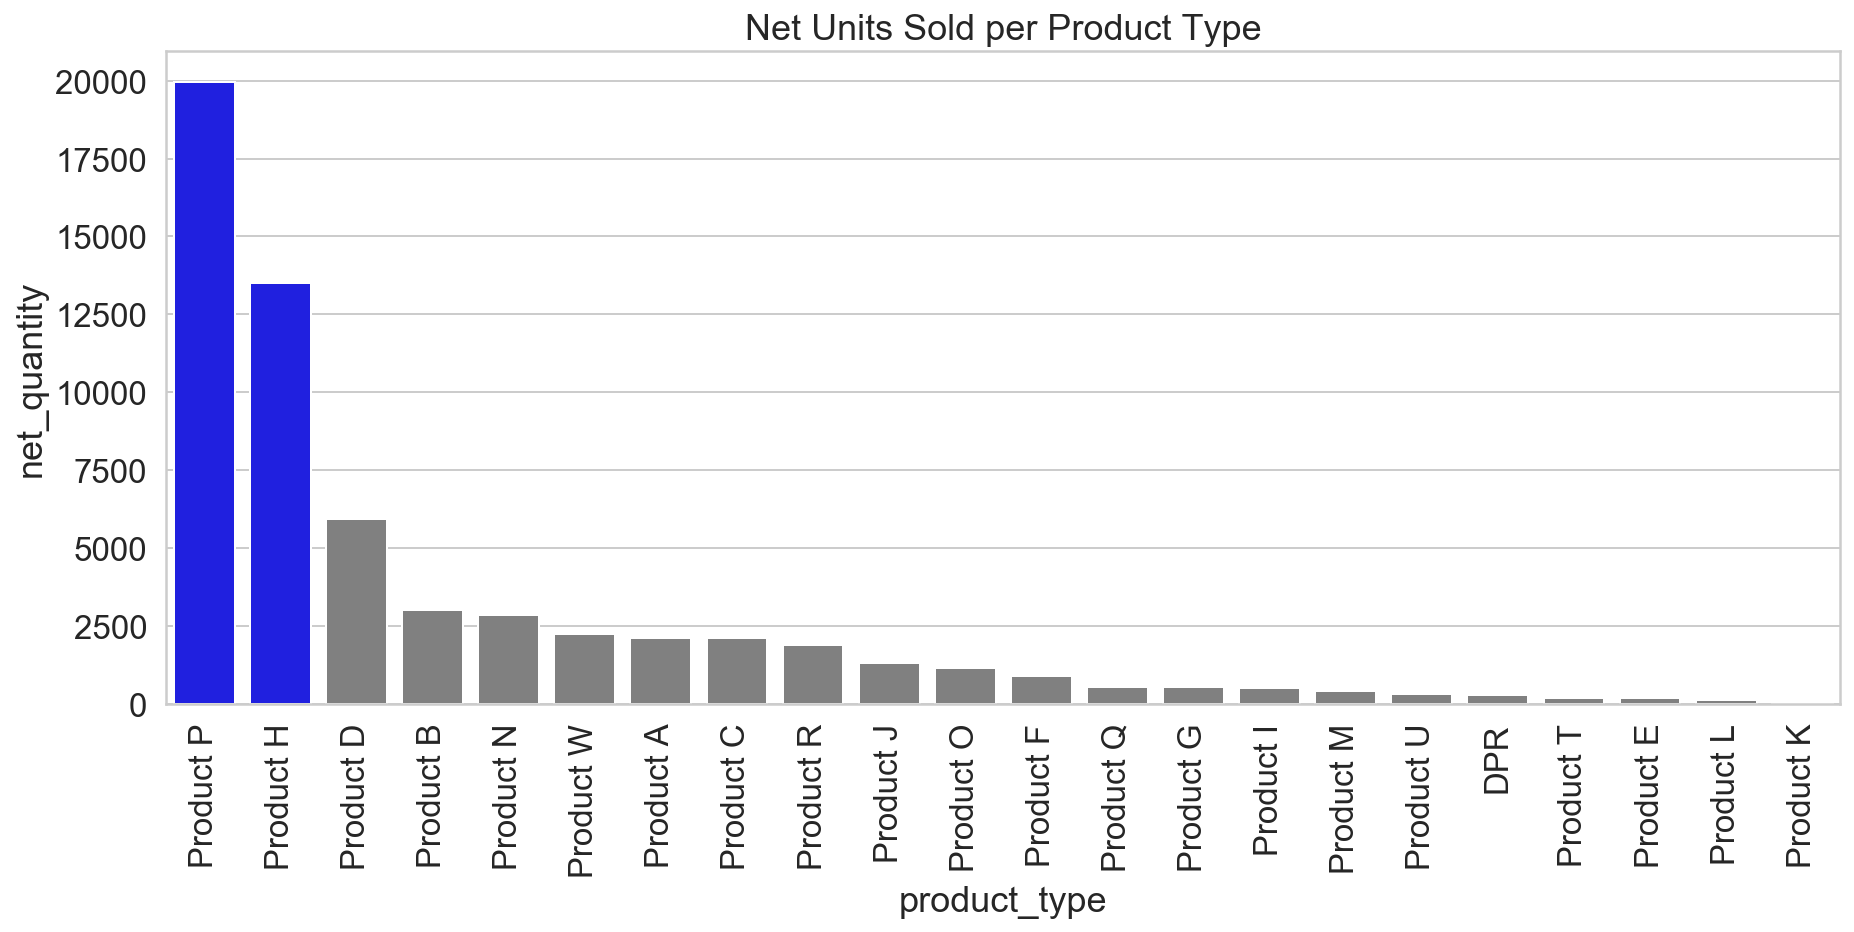

In [13]:
# data will be grouped by product type and analysis will be done by net_quantity
# since net quantity represents the ordered_quantity - returned_quantity
orders_by_product_type = (positive_orders
                          .groupby("product_type")
                          .net_quantity.sum()
                          .reset_index()
                          .sort_values(by=['net_quantity'], ascending=False))

# prepare plot
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5, style="whitegrid")

# set color
labels = np.array(orders_by_product_type.product_type)
values = np.array(orders_by_product_type.net_quantity) 
colors = ['grey' if (x < 7500) # or max(values)
          else 'blue' for x in values]

# set the plot
ax = sns.barplot(x="product_type", 
                 y="net_quantity", 
                 data=orders_by_product_type, 
                 palette = colors)

# set title and arrange x,y ticks
plt.title("Net Units Sold per Product Type")
for item in ax.get_xticklabels():
    item.set_rotation(90)

Product P and H have outnumbered other categories in net unit sales.

* Product P is the minimal and simple design of the retailer with a contemporary look.
* Product H is the signature design of the retailer with a classic and smart casual look.

**Business Decisions:**
* Classic, smart-casual and simple looks appeal more customers.
* Collections that are not depending on seasons attract more people.
* Frequency of purchase or bulk purchase with multiple colors for Product P and H collections might be higher than the other collections, since it seems they are filling the gap for the must-have's of a men's wardrobe.
* Those collections inventory level must be higher than other collections, to prevent probability of stock out.
* When company wants to grow more in terms of revenue, launch or targeted marketing of more classic and casual trousers collections might help.

<h2> What does the distribution of waist sizes look like?
    What does this say about our existing customer base?

In [14]:
# waist size is applicable for trousers, shorts and denims
# create new dataframe for those
trousers = positive_orders[(positive_orders.product_type != "DPR") 
                       & (positive_orders.product_type != "Product R") 
                       & (positive_orders.product_type != "Product N")]

# waist size is embedded in the variant_title as first item: waist_size / other size /  other size
# fetch waist_size from the variant_title and convert to integer
trousers["waist_size"] = (trousers.variant_title
                          .apply(lambda x: x.split()[0]))

trousers["waist_size"] = trousers.waist_size.astype('int64')

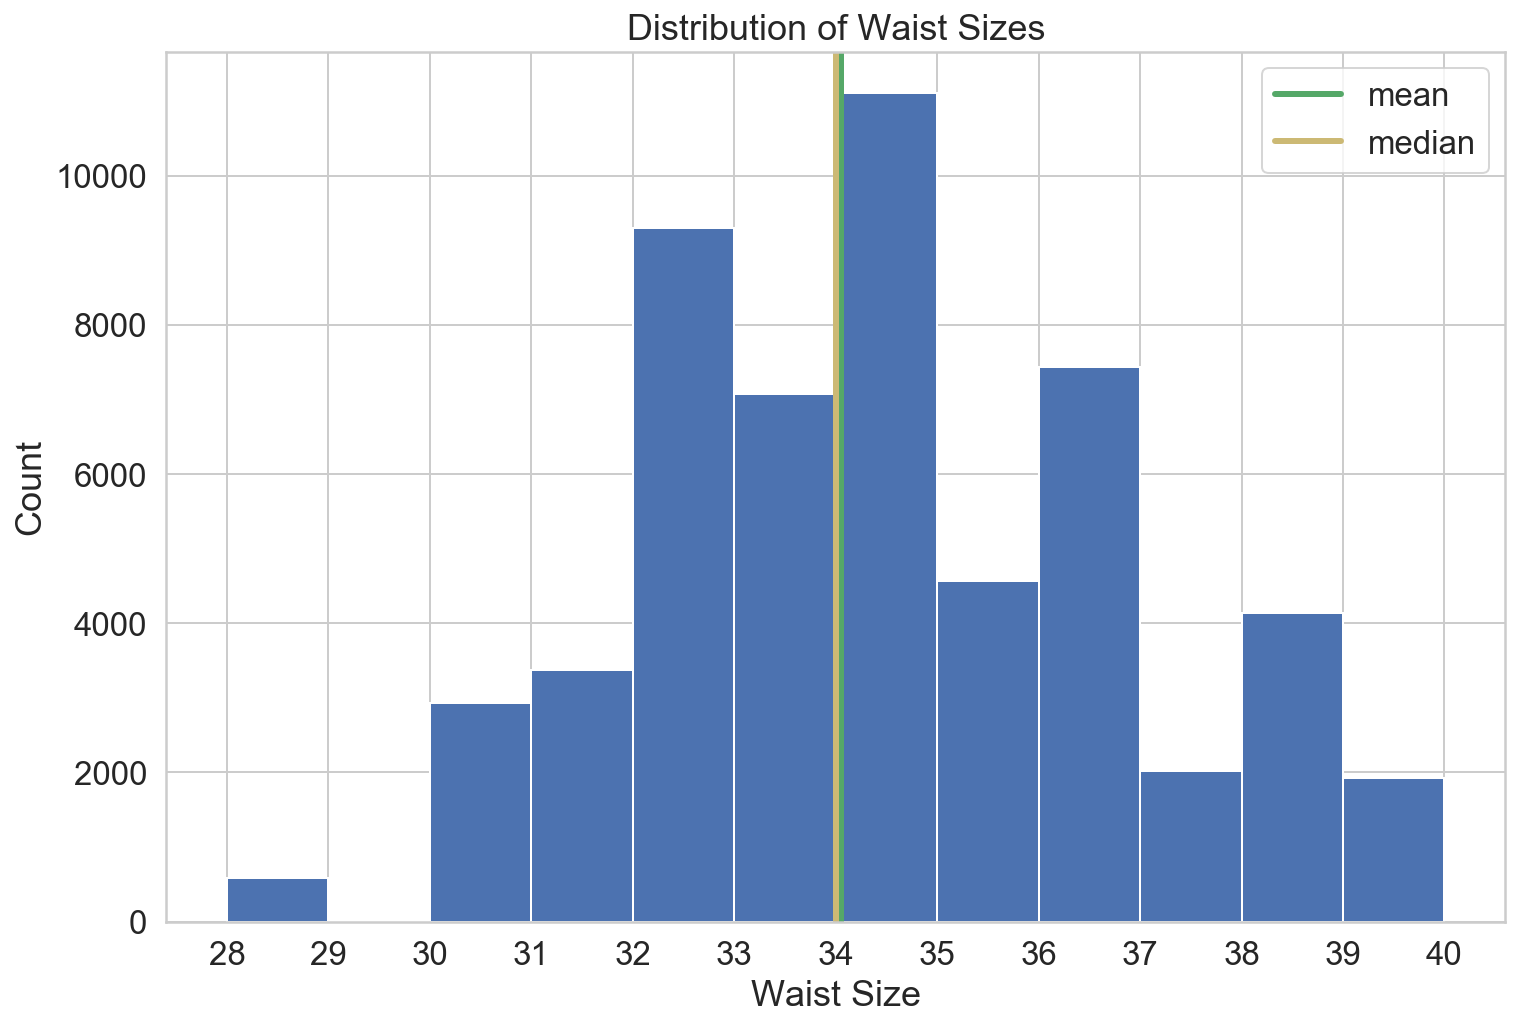

In [15]:
# prepare plot
f, axes = plt.subplots(figsize=(12,8))

# set the histogram, mean and median
plt.hist(trousers.waist_size, 
         range=(trousers.waist_size.min(),trousers.waist_size.max()), 
         bins=12)

plt.axvline(x=trousers.waist_size.mean(), 
            linewidth=3, 
            color='g', 
            label="mean")

plt.axvline(x=trousers.waist_size.median(), 
            linewidth=3, 
            color='y', 
            label="median")

# set title, legends and labels and xticks
axes.set_xticks(range(28,41))
plt.xlabel("Waist Size")
plt.ylabel("Count")
plt.title("Distribution of Waist Sizes")
plt.legend(["mean", "median"])
plt.show()

* Distribution has a peak at `waist_size` 34.
* Distribution of the waist size shows unimodal and symmetric distribution.
* Data is centered around the mean and median, 34, as mid-waist-size.
* Existing customer base waist size is concentrated between 32-36.
* This is a very useful data to plan production quantities of trousers/shorts/jeans in different sizes, production quantities or assortment of sizes can be determined based on this result.
* Also, during a new category launch, more mid-waist-size trousers, denims or shorts should be produced.

<h3> What if we look at distribution of the waist size per collection, what results will it yield?

Text(0.5, 1, 'Boxplot of Waist Size and Product Type')

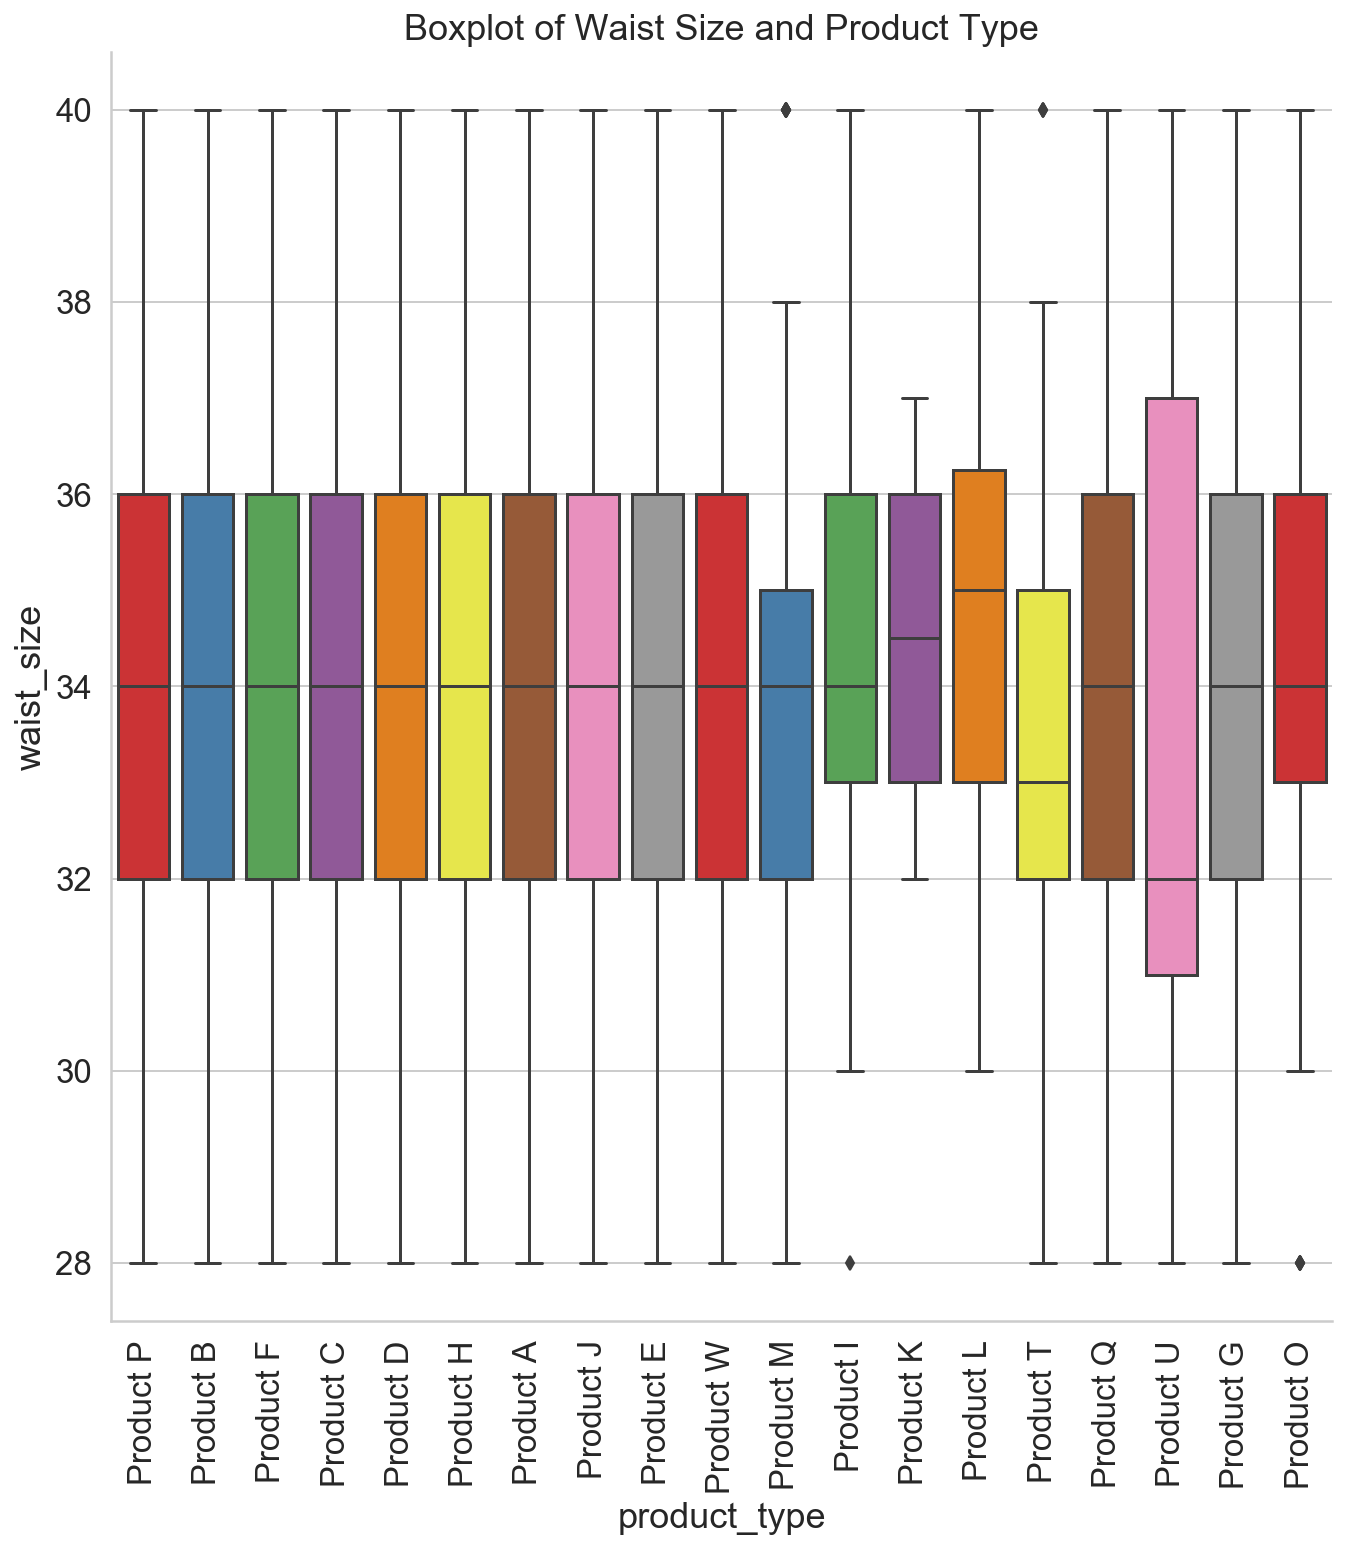

In [16]:
# look at distribution of waist_size per product_type
g = sns.catplot(x = "product_type", 
                y = "waist_size", 
                data = trousers, 
                kind = "box", 
                height = 10, 
                palette = "Set1")

g.set_xticklabels(rotation = 90)
plt.title('Boxplot of Waist Size and Product Type')

* As expected, among the collections, waist size is concentrated between 32 and 36.

<h2> What is our unit return rate?
    Bonus points: what is our unit return rate for customers who ordered multiple sizes?

In [17]:
# to look at unit return rate, ratio of all returned items to the ordered items will be investigated
returned_sum = float(-1*(positive_orders["returned_item_quantity"].sum()))

ordered_sum = float(positive_orders["ordered_item_quantity"].sum())

unit_return_rate = returned_sum / ordered_sum

print("The unit return rate is : "'%.4f'%unit_return_rate)

The unit return rate is : 0.0012


Unit return rate is %0.1, it might be benefical to investigate return rate per orders as well, which might give a better clue of return rate.

In [18]:
# aggregate data per orders, to see ordered item sum and returned sum
ordered_sum_by_order = (positive_orders
                        .groupby("order_id")
                        .ordered_item_quantity.sum()
                        .reset_index())

returned_sum_by_order = (positive_orders
                         .groupby("order_id")
                         .returned_item_quantity.sum()
                         .reset_index())

# merge two dataframes
orders_by_order_id = pd.merge(ordered_sum_by_order, 
                              returned_sum_by_order)

orders_by_order_id["return_rate"] = ((-1*orders_by_order_id["returned_item_quantity"]) / 
                                     orders_by_order_id["ordered_item_quantity"])

print("Average return rate per order is: "'%.4f'%orders_by_order_id["return_rate"].mean())

Average return rate per order is: 0.0014


Average return rate for orders are %0.1 which is not signifcantly different than the unit return rate.

<h3> Unit return rate for customers who ordered multiple sizes: </h3>
* To answer this question, tshirts and trousers/shorts/jeans will be considered seperately. <br>
* Size is considered S, M, L, XL (and so on) for t-shirts and waist size for trousers/jeans/shorts. Rest of the elements in the `variant_title` considered as cuts. <br>
* Trousers dataframe that is created for question 3 will be used for this analysis. <br>
* Tshirts dataframe will be created. <br>

<h4> Create tshirts dataframe and add size column

In [19]:
# create tshirts dataframe and fetch size from variant_title
tshirts = positive_orders[(positive_orders.product_type == "Product R") 
                          | (positive_orders.product_type == "Product N")]

tshirts["size"] = (tshirts.variant_title
                   .apply(lambda x: x.split(" ")[0]))

<h4> Create functions to identify customers who order multiple sizes

In [20]:
def encode_sizes(column):
    '''function to encode a size into 1 if bought, 0 if not bought'''
    if column > 0:
        return 1
    if column <= 0:
        return 0

def aggregate_by_ordered_quantity(dataframe, column_list):
    '''this function:
    1. aggregates a given dataframe by column list, 
    as a result creates a aggregated dataframe by counting the ordered item quantities
    
    2. adds number_of_sizes_ordered column to the aggregated dataframe by encoding ordered sizes into 1
    
    3. creates final dataframe containing information about 
    how many sizes are ordered, based on the first element passed in the column list'''
    
    aggregated_dataframe = (dataframe
                            .groupby(column_list)
                            .ordered_item_quantity.count()
                            .reset_index())
    
    aggregated_dataframe["num_of_sizes_ordered"] = (aggregated_dataframe
                                                    .ordered_item_quantity
                                                    .apply(encode_sizes))
    
    final_dataframe = (aggregated_dataframe
                       .groupby(column_list[0])
                       .num_of_sizes_ordered.sum()
                       .reset_index())
    
    return final_dataframe

<h4> Identify customers who order multiple sizes in trousers or t-shirts category

In [21]:
# apply functions to trousers
customers_by_size_orders1 = aggregate_by_ordered_quantity(trousers, ["customer_id", "waist_size"])
print("for trousers/jeans/denims:")
print(customers_by_size_orders1.head())

# apply functions to tshirts
customers_by_size_orders2 = aggregate_by_ordered_quantity(tshirts, ["customer_id", "size"])
print("for tshirts:")
print(customers_by_size_orders2.head())

# concatenate two dataframes for the customers who ordered multiple sizes and drop duplicates
customers_by_size_orders = (pd
                            .concat([customers_by_size_orders1[
                                customers_by_size_orders1.num_of_sizes_ordered > 1], 
                                      customers_by_size_orders2[
                                          customers_by_size_orders2.num_of_sizes_ordered > 1]
                                    ]))

customers_by_size_orders.drop_duplicates(subset=["customer_id"], inplace=True)
# now we have a dataset that indicates customer_ids who ordered multiple sizes either in tshirts or trousers/shorts/denims

for trousers/jeans/denims:
   customer_id  num_of_sizes_ordered
0      1000661                     1
1      1001914                     1
2      1002167                     1
3      1002387                     1
4      1002419                     1
for tshirts:
   customer_id  num_of_sizes_ordered
0      1006436                     1
1      1013613                     1
2      1016212                     1
3      1017090                     1
4      1021299                     1


<h4> Prepare datasets for unit return rate calculation

In [22]:
# aggregate data per customer_id, to see ordered item sum and returned sum per customer
ordered_sum_by_customer = (positive_orders
                           .groupby("customer_id")
                           .ordered_item_quantity.sum()
                           .reset_index())

returned_sum_by_customer = (positive_orders
                            .groupby("customer_id")
                            .returned_item_quantity.sum()
                            .reset_index())

# merge two dataframes to be able to calculate unit return rate
orders_by_customer_id = pd.merge(ordered_sum_by_customer, returned_sum_by_customer)

# inner join orders_by_cust_id and customers_by_size_orders 
# to calculate the unit return rate customers with multiple size orders
customers_with_multiple_orders = pd.merge(customers_by_size_orders,
                                          orders_by_customer_id,
                                          on="customer_id")

customers_with_multiple_orders.head()

,customer_id,num_of_sizes_ordered,ordered_item_quantity,returned_item_quantity
0,1003728,2,2,0
1,1003899,4,11,0
2,1006436,3,4,0
3,1006697,2,2,0
4,1007931,2,2,0


<h4> Unit return rate calculation for the identified customers

In [23]:
# to look at unit return rate for the customers ordered multiple sizes, 
# ratio of all returned items to the ordered items will be investigated
returned_sum_multiple = float(-1 * customers_with_multiple_orders.returned_item_quantity.sum())

ordered_sum_multiple = float(customers_with_multiple_orders.ordered_item_quantity.sum())

unit_return_rate_multiple = returned_sum_multiple / ordered_sum_multiple

print("The unit return rate is : "'%.4f'%unit_return_rate_multiple)

The unit return rate is : 0.0014


**Looks like return rate of the company are really low in all of the 3 cases:**
* unit return for all customers (0.0012)
* average return rate per order (0.0014)
* unit return rate for customers who order multiple sizes (0.0014)

<h2> Did you find anything interesting in the way this data is structured? </h2>

1) One interesting thing is: there were more than 10000 rows whose `ordered_item_quantity` is 0 and `returned_item_quantity` is negative, which I assumed those SKUs are not sold at all, at the beginning of the analysis for questions 2, 3 and 4. 

2) Those rows might represent erroneous data in the orders data or volume gifts given to specific customers. Dataset needs more investigation on why items that are not ordered have returned.

3) Another interesting thing is: In some rows, there is a gross sales value greater than 0, but net sales value is 0, which shows purchase made with a 100% discount. I thought these might be the purchases made without charge by the company employees or with coupons.

4) Data was clean and well formatted, it had no NA values.

5) There was no unique key in the dataset, since it looks like a joined table of customers and orders.

<h2> What analysis could we run using this data? </h2>

**In addition to questions replied above, some insights can be drawn from the dataset are:**

- Does discounts drive the sales of the company (by looking at the number of sales without discount vs number of discounted sales)? 

- Does price have an affect on buying multiple items in one order?

- What is the monthly, quarterly sales volume?

- What is the monthly, quarterly return rate?

- Are there any specific SKUs or collections that are returned frequently?

- Do the customers have a favorite weekday to do shopping?

- Are weekend sales more than weekday sales?

- Does seasonality affect the sales of particular collections?

- Which colors are more popular among customers?

- Which builds (A, B, C) are sold most?

- Is fixed leg size(28, 29, 30 and so on) or finished to order, make to order leg sizes ordered more?

- Who are our most loyal (frequently orders from the company) customers? (by doing customer segmentation)

- Can we group our customer base (perform customer segmentation), and take actions for different customer segments ?

- Does the company have a price range that sells more (E.g. to determine pricing for a new collection)?

- Which gift card is sold more?